In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

# Size of random forest

In [3]:
data = pd.read_csv("C:/Users/Leonid/Downloads/abalone.csv")

In [4]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [35]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-1]]

In [42]:
Y1=Y.values.ravel()
X1=X.as_matrix()

In [56]:
kfl = KFold(len(data), n_folds=5, shuffle=True, random_state=1)
scores = []
k_range = range(1,50)
for i in k_range:
    clf = RandomForestRegressor(n_estimators=i,random_state=1)
    scores.append(cross_val_score(clf, X1, Y1, cv=kfl, scoring='r2').mean())

In [58]:
print "Maximum R2 for k=" + str(scores.index(max(scores))+1) + " with error " + str(max(scores))

Maximum R2 for k=49 with error 0.529059836682


In [66]:
print "Minimum estimators giving accuracy > 0.52: {0}".format([i for i in range(len(scores)) if scores[i] > 0.52][0])

Minimum estimators giving accuracy > 0.52: 23


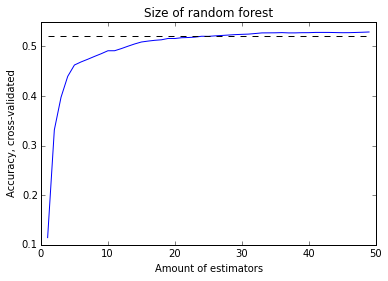

In [76]:
plt.figure(1)
plt.plot(k_range, scores)
plt.plot(k_range, map(lambda x: 0.52, k_range), 'k--')
plt.xlabel("Amount of estimators")
plt.ylabel("Accuracy, cross-validated")
plt.title("Size of random forest")
plt.show()

# Boosting

In [77]:
data = pd.read_csv("C:/Users/Leonid/Downloads/gbm-data.csv")

In [80]:
Y=data[[0]]
X=data[data.columns[1:]]

In [84]:
Y1=Y.values.ravel()
X1=X.as_matrix()

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=241)

In [115]:
l = 0.2
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = l)
model = clf.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613            1.23m
         2           1.1715            1.09m
         3           1.1009           59.36s
         4           1.0529           56.15s
         5           1.0130           54.59s
         6           0.9740           52.95s
         7           0.9475           51.17s
         8           0.9197           50.76s
         9           0.8979           49.24s
        10           0.8730           48.65s
        20           0.7207           41.83s
        30           0.6055           38.70s
        40           0.5244           35.53s
        50           0.4501           33.62s
        60           0.3908           31.81s
        70           0.3372           30.19s
        80           0.3009           28.57s
        90           0.2603           26.84s
       100           0.2327           24.83s
       200           0.0835            7.87s


C:\Users\Leonid\Anaconda\lib\site-packages\sklearn\utils\validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
log_loss_train = []
for predict in model.staged_decision_function(X_train):
    predict = 1.0/(1.0+exp(-predict))
    log_loss_train.append(log_loss(Y_train, predict))
log_loss_test = []
for predict in model.staged_decision_function(X_test):
    predict = 1.0/(1.0+exp(-predict))
    log_loss_test.append(log_loss(Y_test, predict))

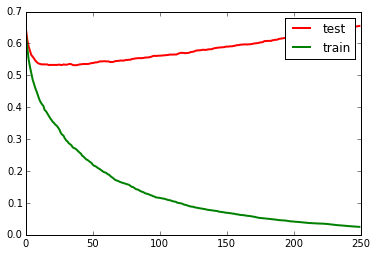

In [117]:
plt.figure()
plt.plot(log_loss_test, 'r', linewidth=2)
plt.plot(log_loss_train, 'g', linewidth=2)
plt.legend(['test', 'train'])
plt.show()

In [118]:
print "Minimum log_loss is {0:0.2f} and it's achived on the {1} iteration ".format(min(log_loss_test), log_loss_test.index(min(log_loss_test)))

Minimum log_loss is 0.53 and it's achived on the 36 iteration 


In [123]:
clf2 = RandomForestClassifier(random_state=241, n_estimators = log_loss_test.index(min(log_loss_test)))
model2 = clf2.fit(X_train, Y_train)

C:\Users\Leonid\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from IPython.kernel.zmq import kernelapp as app


In [130]:
predict2 = clf2.predict_proba(X_test)
log_loss_rfc = log_loss(Y_test, predict2)
print log_loss_rfc

0.540966705647
